<a href="https://colab.research.google.com/github/IamHeeJ/ML_Ex/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6-3. 주성분 분석

##차원과 차원 축소

**차원 축소(dimentionality reduction)**

차원의 개념

- 다차원 배열 : 차원은 배열의 축 개수

- 1차원 배열 : 차원은 원소의 개수 (특성이라고 부르자)


**특성이 많으면?**

장점 : 선형 모델의 성능이 높아짐

단점
  - 훈련 데이터에 쉽게 과대적합됨
  - 데이터 용량 급증하여 저장공간 부족
  - 모델 처리속도 떨어짐(계산량 증가)

차원 축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능 향상시킬 수 있음

줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 있음



##PCA 클래스

**주성분 분석(PCA, principal component analysis)**

- 대표적인 차원 축소 알고리즘
- 데이터에 있는 분산이 큰 방향을 찾는 것 = **데이터를 잘 표현하는 벡터를 찾는 것**
  - 분산 : 데이터가 널리 퍼져있는 정도



- **주성분**
  - 주성분 벡터는 원본 데이터에 있는 어떤 방향

자세한건 p.320

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
# 2차원 배열로 변환
fruits_2d = fruits.reshape(-1, 100*100)

--2023-11-01 04:23:37--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-11-01 04:23:37--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-11-01 04:23:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

**PCA**

- 주성분 분석 알고리즘 구현하는 클래스

- n_components : 주성분의 개수를 지정하는데 필수로 사용해야 하는 매개변수



In [ ]:
# 주성분 분석 알고리즘 클래스 불러오기
from sklearn.decomposition import PCA

# 50개의 주성분을 찾음 = 10000개에서 50개로 줄인다는 뜻
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


=> 50 개의 주성분을 찾음

**두번째 차원은 항상 원본 데이터의 특성 개수와 같으므로** 10000

(벡터를 표현하기 위해 필요한 차원이 10000개)

주의점 : 주성분 벡터의 크기는 원본 데이터와 동일함

**주성분을 이미지로 출력**

이전 절에서 만든 draw_fruits()사용

In [ ]:
import matplotlib.pyplot as plt

# 사용자 정의 함수 생성
def draw_fruits(arr, ratio=1):  #ratio : figsize지정. 기본값은 1
    n = len(arr)    # n은 샘플 개수

    # rows: 행 개수 지정, cols: 열 개수 지정
    # 한 행에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10)) #ceil:올림
    # 행이 1개면 열 개수=샘플 개수, 그렇지 않으면 열 10개
    cols = n if rows < 2 else 10

    # subplots() : 2개의 원소를 가지는 array형태로 axis 객체 반환
    # squeeze : False면 2개의 원소를 (1,2)같은 2차원 형태로 반환,
    #           True면 (2, )와 같은 1차원 형태로 반환
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    # for문으로 이미지 그리기
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off') # 좌표축 표시 제거
    plt.show()

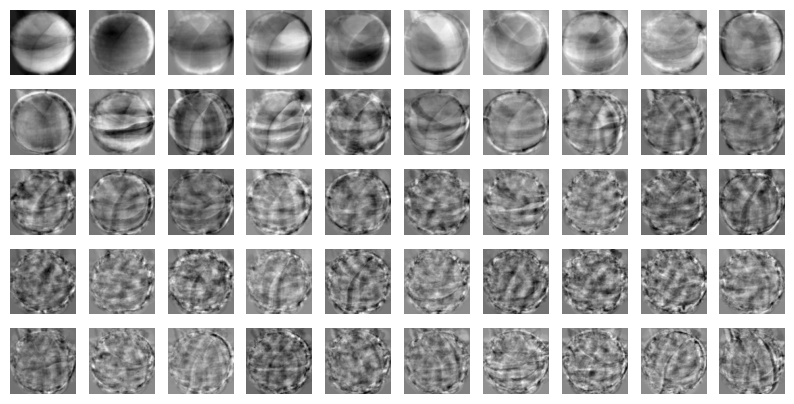

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

=> 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

분산이 큰 순으로 찾아주기 때문

데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음



---


찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄이기

In [ ]:
# 10000개 특성인 데이터를 transform으로 50개로 바꿔줌
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


지금까지의 과정
1. 주성분 찾기
2. 찾은 주성분으로 훈련데이터 찾기
3. 10000->50개로 차원축소

##원본 데이터 재구성

50개로 줄였던 데이터를 다시 10000개로 확대(재구성)함

=> 손실 발생할 수 있음

주성분을 최대로 사용하면 거의 완벽하게 원본 데이터를 재구성할 수 있음

=> 하지만 최대로 사용하면 여태 과정이 의미가 없어지기 때문에 그렇게하진 않음

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

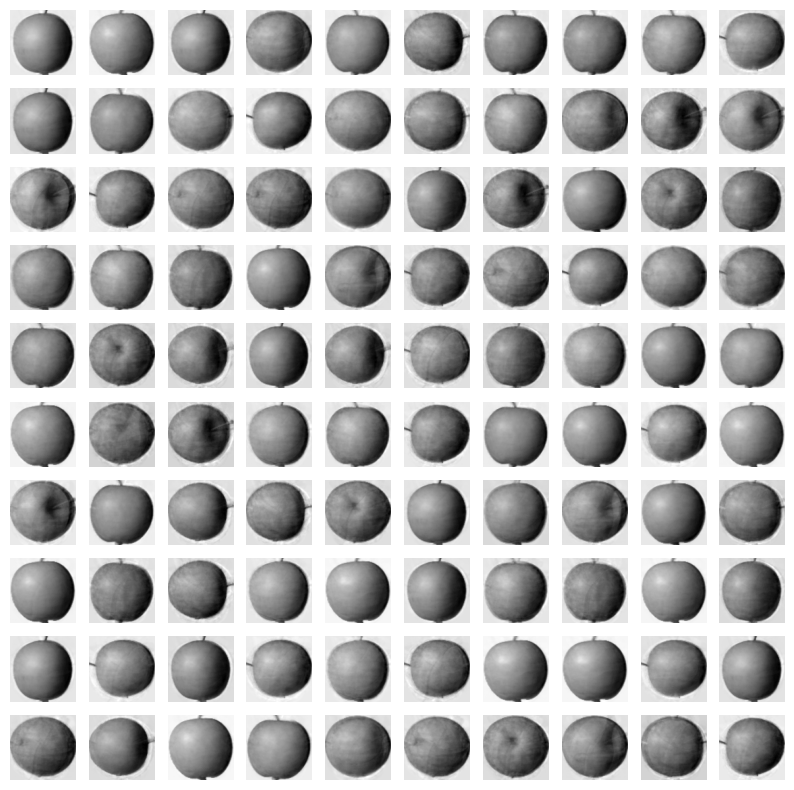

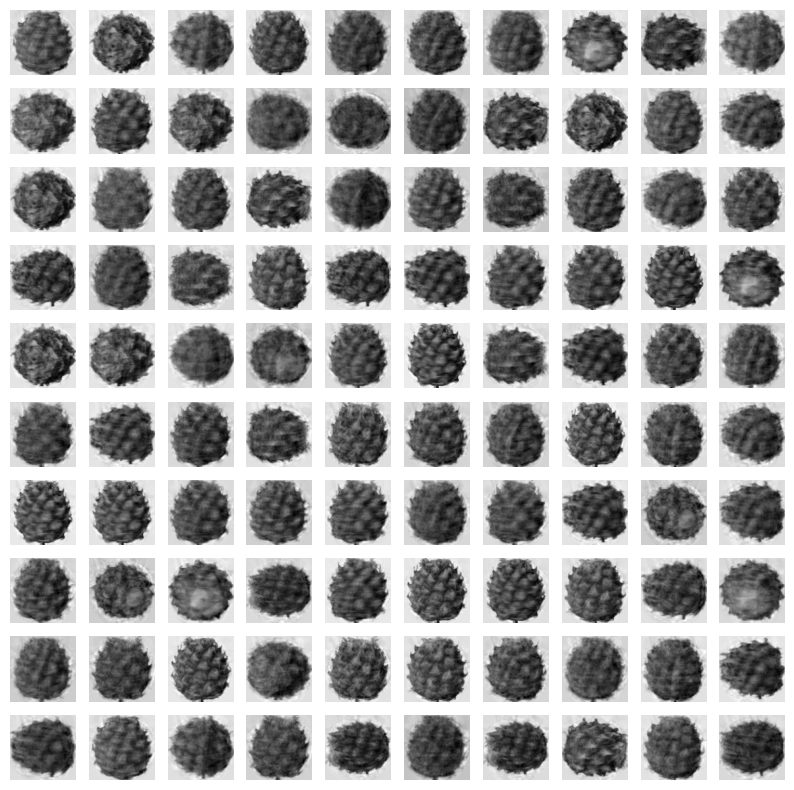

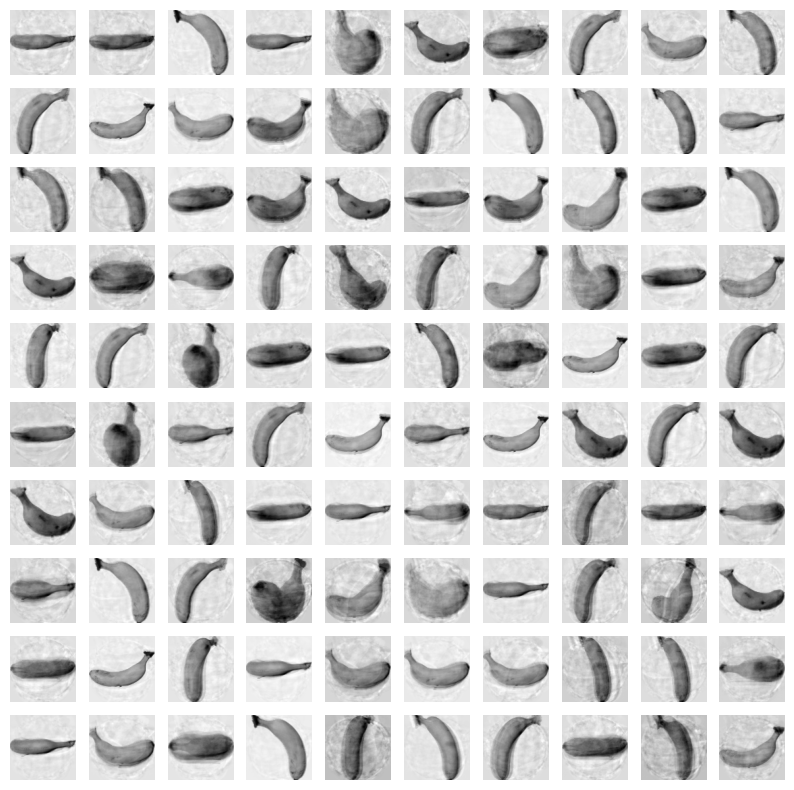

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

=> 손실이 발생한 것을 확인할 수 있음

##설명된 분산

**설명된 분산(explained variance)**
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- 어쩌구저쩌구....

잘 알아두면 좋은 정도


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9214891646207075


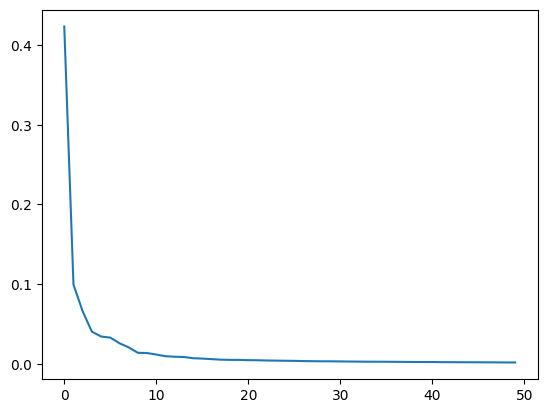

In [ ]:
plt.plot(pca.explained_variance_ratio_)

##다른 알고리즘과 함께 사용하기

**과일사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자**

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델 사용

지도 학습 모델이므로 타깃값 설정

사과=0, 파인애플=1, 바나나=2

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 0,1,2로 구성된 100개 배열 3개를 합쳐서 총 300개의 배열로 만듬 (각각 100개씩 있어서 가능함 )
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) #(모델객체, 입력값, 타깃값)
print(np.mean(scores['test_score']))  #테스트 점수
print(np.mean(scores['fit_time']))    #걸린 시간(초단위)

0.9966666666666667
2.672308015823364


=> 원본데이터 사용했을 때 99%의 정확도와, 2.5초 정도의 학습시간이 걸림

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04515209197998047


=> PCA로 훈련데이터 차원을 축소하면 정확도100%, 걸린시간 0.01초

손실이 있음에도 불구하고 성능은 더 좋고 훈련 속도도 훨씬 빠름

차원 축소하면 저장공간 뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음



---

.

주성분의 개수 대신 설명된 분산의 비율로 주성분을 찾을 수 있음

- n_components 매개변수에 설명된 분산의 비율 입력

2
0.5229877245800599


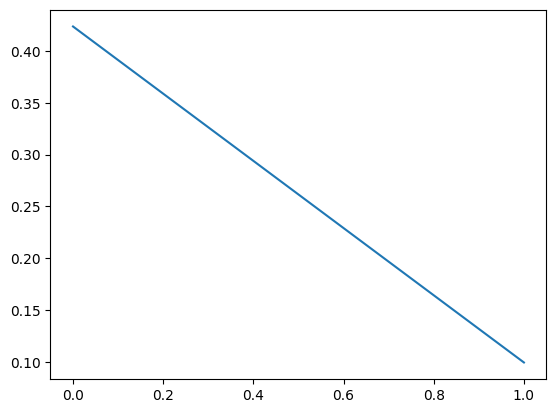

In [ ]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

#그림은 한번 그려봄
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

=> 설명된 분산의 50%에 달하는 주성분을 찾도록 pca 모델 만듬

In [ ]:
print(pca.n_components_)

2


=> 2개의 주성분을 찾음

2개의 특성만으로 원본데이터의 분산의 50%를 표현할 수 있다

In [ ]:
# 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
# 교차 검증 수행
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04135951995849609


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

=> 2개의 특성만으로 99%의 정확도 달성

---

.

차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾아보기

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


=> 6-2절에서 원본데이터를 사용했을 때와 거의 비슷한 결과를 보임

원본데이터 사용시 : (array([0, 1, 2], dtype=int32), array([111,  98,  91]))

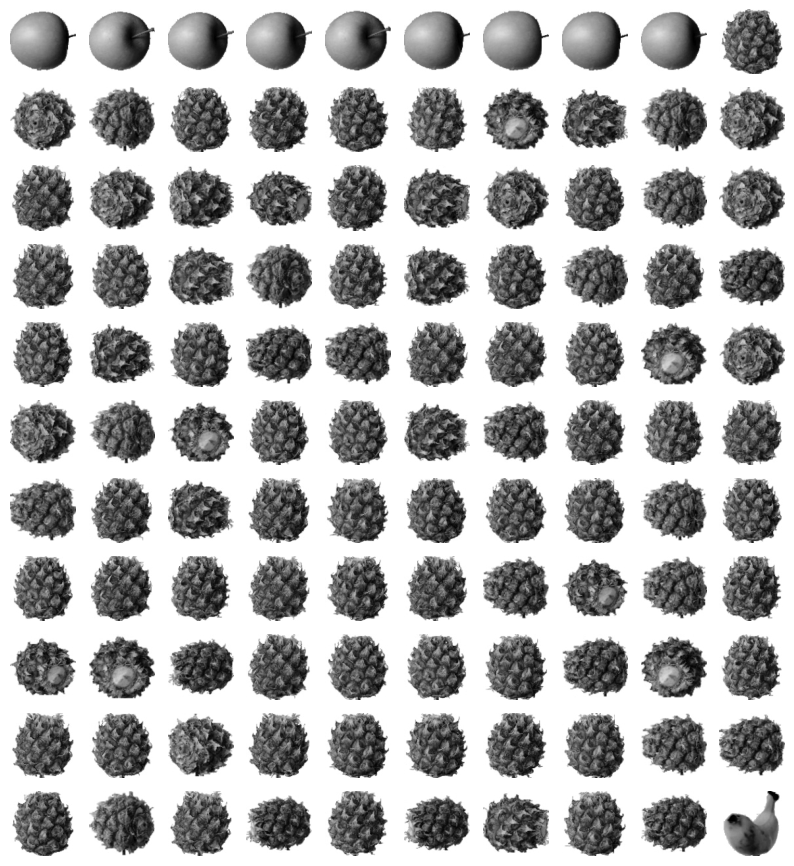

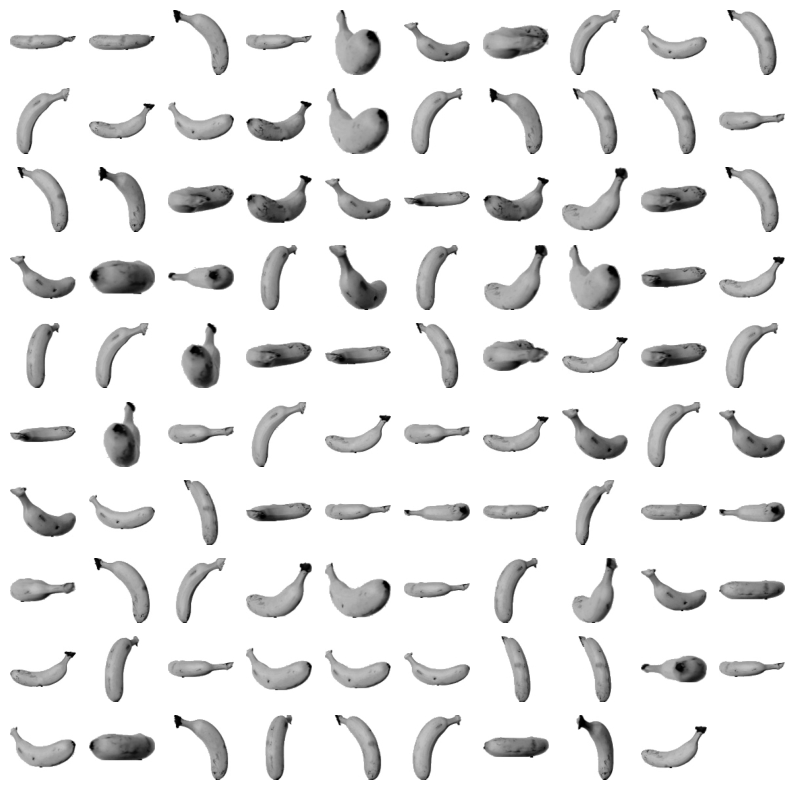

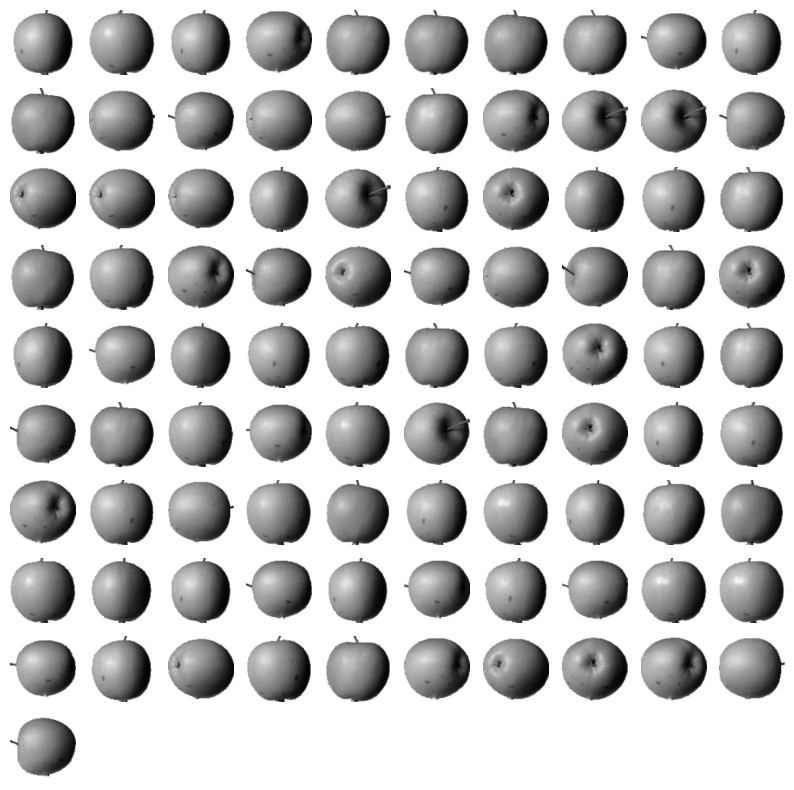

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

차원 축소의 또다른 장점 : 시각화

3개 이하로 차원을 줄이면 화면 출력하기 비교적 쉬움

km.labels_을 이용해 클러스터별로 산점도 표시

- fruits_pca 데이터는 2개의 특성이 있으므로 2차원으로 표현할 수 있음

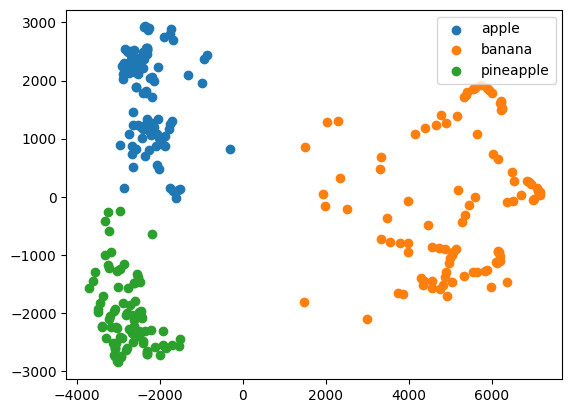

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

=> 각 클러스터의 범위가 잘 분리되어 나타남

In [ ]:
# 원본 데이터와 비교

#이거작성..해야됨

=> 파인애플 클러스터의 경계와 가까운 샘플이 틀림



---

.

차원축소 장점

1. 과대적합 억제
2. 저장공간 확보
3. 모델 처리속도 상승
4. 모델 성능 상승
5. 시각화 기능